In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


jacob_TM_ (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = 0..40, 0..1,  0..1
box = E × x × y
using CairoMakie

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), adaptive = false, dt = 0.001)

In [373]:
# I0 = -0.9; U0 = 0.265;
I0 = -0.9; U0 = 0.265; # I0 = -1.10656 # Hopf
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.638526524981895, 0.7320692774159767, 0.40718205935401675]

3-element Vector{Float64}:
 8.638526524981895
 0.7320692774159767
 0.40718205935401675

In [374]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -0.9]
 time:          0.0
 state:         [8.638526524981895, 0.7320692774159767, 0.40718205935401675]


In [375]:
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = 0);

In [370]:
lb_size = 35; tck_size = 30;

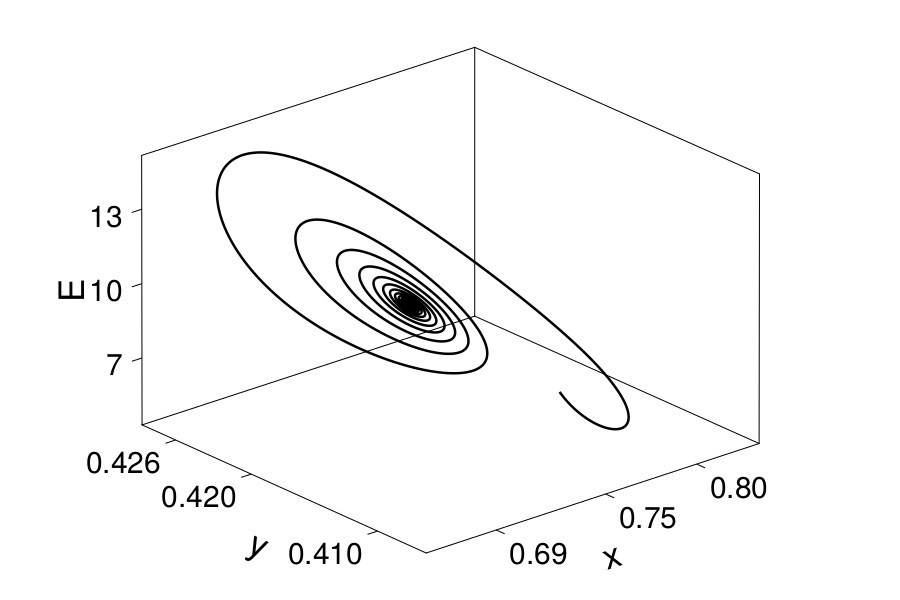

CairoMakie.Screen{IMAGE}


In [376]:
ts, tf = 1, 20000
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.69, 0.75, 0.80], yticks = [0.410, 0.42, 0.426], zticks = [7, 10, 13])
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 2.5, color = :black)

display(f)

In [312]:
#save("stable_equilibrium.eps", f)